In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('00_Data/relevant_data.csv')
data

,SCRAM,EST_ST,EST_MSA,TBIRTH_YEAR,ARACE,EGENID_BIRTH,THHLD_NUMPER,AHHLD_NUMPER,THHLD_NUMKID,THHLD_NUMADLT,...,INCOME,FRMLA_AGE,BABY_FED,MHLTH_NEED,MHLTH_GET,MHLTH_SATISFD,MHLTH_DIFFCLT,SOCIAL1,SOCIAL2,CURFOODSUF
0,P090000004,48,19100.0,1970,2,2,1,2,0,1,...,8,-88,-88,-88,-88,-88,-88,2,4,2
1,P090000005,12,NaN,1958,2,1,1,2,0,1,...,3,-88,-88,-88,-88,-88,-88,5,5,1
2,P090000009,17,16980.0,1955,2,2,2,2,0,2,...,5,-88,-88,-88,-88,-88,-88,2,4,1
3,P090000011,4,38060.0,1961,2,2,3,2,0,3,...,-88,-88,-88,-88,-88,-88,-88,2,4,2
4,P090000014,22,NaN,1992,2,2,4,2,2,2,...,1,-88,-88,2,1,1,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,P090051256,34,35620.0,1960,2,2,6,2,3,3,...,-88,-88,-88,3,-88,-88,-88,5,5,-88
49996,P090051256,34,35620.0,1960,2,2,6,2,3,3,...,-88,-88,-88,3,-88,-88,-88,5,5,-88
49997,P090051258,24,47900.0,1984,2,2,3,2,1,2,...,6,-88,-88,3,-88,-88,-88,2,2,3
49998,P090051258,24,47900.0,1984,2,2,3,2,1,2,...,6,-88,-88,3,-88,-88,-88,2,2,3


In [4]:
data['INCOME'].unique()

array([  8,   3,   5, -88,   1,   4,   6,   7, -99,   2])

In [5]:
# Remove rows where INCOME is -99 or -88
df_cleaned = data[~data['INCOME'].isin([-99, -88])]
df_cleaned = df_cleaned[['INCOME', 'SEEING', 'HEARING', 'REMEMBERING', 'MOBILITY', 'SELFCARE', 'UNDERSTAND']]
df_cleaned

,INCOME,SEEING,HEARING,REMEMBERING,MOBILITY,SELFCARE,UNDERSTAND
0,8,1,1,1,1,1,1
1,3,3,1,1,1,1,1
2,5,1,1,1,1,1,1
4,1,3,2,3,2,1,1
5,4,2,2,1,2,1,1
...,...,...,...,...,...,...,...
49991,8,1,1,1,1,1,1
49992,8,1,1,1,1,1,1
49997,6,1,1,1,1,1,1
49998,6,1,1,1,1,1,1


In [6]:
income_amounts = [12500, 30000, 42500, 62500, 87500, 125000, 175000, 200000]
# Create a mapping dictionary
income_mapping = {i: income_amounts[i - 1] for i in range(1, 9)}

# Map the INCOME values to the actual income amounts
df_cleaned['INCOME_AMOUNT'] = df_cleaned['INCOME'].map(income_mapping)
df_cleaned

,INCOME,SEEING,HEARING,REMEMBERING,MOBILITY,SELFCARE,UNDERSTAND,INCOME_AMOUNT
0,8,1,1,1,1,1,1,200000
1,3,3,1,1,1,1,1,42500
2,5,1,1,1,1,1,1,87500
4,1,3,2,3,2,1,1,12500
5,4,2,2,1,2,1,1,62500
...,...,...,...,...,...,...,...,...
49991,8,1,1,1,1,1,1,200000
49992,8,1,1,1,1,1,1,200000
49997,6,1,1,1,1,1,1,125000
49998,6,1,1,1,1,1,1,125000


In [7]:
df_cleaned.to_csv('survey_data.csv')

In [8]:
# Define the categorical columns for analysis
categorical_columns = ['INCOME', 'SEEING', 'HEARING', 'REMEMBERING', 'MOBILITY', 'SELFCARE', 'UNDERSTAND']

Number of -88 & -99 answers: 
INCOME           0
SEEING          50
HEARING        193
REMEMBERING    105
MOBILITY       120
SELFCARE       106
UNDERSTAND      86
dtype: int64

Number of samples after data cleaning:  40214


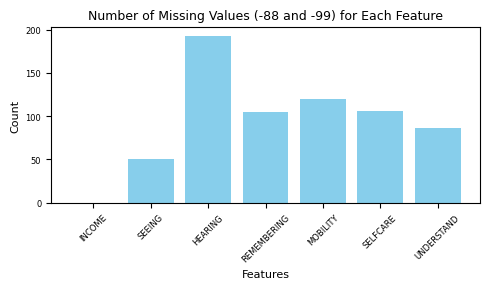

In [22]:
import matplotlib.pyplot as plt
import matplotlib
#matplotlib.use('TkAgg')

# Count -88 and -99 values for each feature
missing_counts = df_cleaned[categorical_columns].isin([-88, -99]).sum()
print("Number of -88 & -99 answers: ")
print(missing_counts)
print("")
# Calculate the number of samples left after excluding -88 and -99
samples_left = len(df_cleaned) - df_cleaned[categorical_columns].isin([-88, -99]).any(axis=1).sum()
print("Number of samples after data cleaning: ",samples_left)

# Plot the number of -88 and -99 values for each feature
# Convert missing counts to a Pandas Series if it's not already
missing_counts_series = pd.Series(missing_counts, index=categorical_columns)

# Convert to a dictionary for manual plotting
missing_counts_dict = missing_counts.to_dict()

# Plot using matplotlib
plt.figure(figsize=(5, 3))
plt.bar(missing_counts_dict.keys(), missing_counts_dict.values(), color='skyblue')
plt.title('Number of Missing Values (-88 and -99) for Each Feature', fontsize=9)
plt.xlabel('Features', fontsize=8)
plt.ylabel('Count', fontsize=8)
plt.yticks(fontsize=6)
plt.xticks(rotation=45, fontsize=6)
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()

In [23]:
# Exclude rows with -88 and -99 in any categorical column
filtered_data = df_cleaned[~df_cleaned[categorical_columns].isin([-88, -99]).any(axis=1)]

In [24]:
# Descriptive analysis on filtered data
# Summary statistics
def calculate_summary_stats(data, columns):
    summary = {}
    for col in columns:
        counts = data[col].value_counts().sort_index()
        proportions = counts / len(data)
        summary[col] = pd.DataFrame({'Count': counts, 'Proportion': proportions})
    return summary

summary_stats_filtered = calculate_summary_stats(filtered_data, categorical_columns)
summary_stats_filtered

{'INCOME':         Count  Proportion
 INCOME                   
 1        5925    0.147337
 2        4130    0.102701
 3        5145    0.127941
 4        6981    0.173596
 5        5101    0.126846
 6        6147    0.152857
 7        2945    0.073233
 8        3840    0.095489,
 'SEEING':         Count  Proportion
 SEEING                   
 1       27770    0.690556
 2       11304    0.281096
 3        1085    0.026981
 4          55    0.001368,
 'HEARING':          Count  Proportion
 HEARING                   
 1        33356    0.829462
 2         6080    0.151191
 3          708    0.017606
 4           70    0.001741,
 'REMEMBERING':              Count  Proportion
 REMEMBERING                   
 1            27042    0.672452
 2            11506    0.286119
 3             1624    0.040384
 4               42    0.001044,
 'MOBILITY':           Count  Proportion
 MOBILITY                   
 1         30048    0.747202
 2          8002    0.198985
 3          2000    0.049734
 

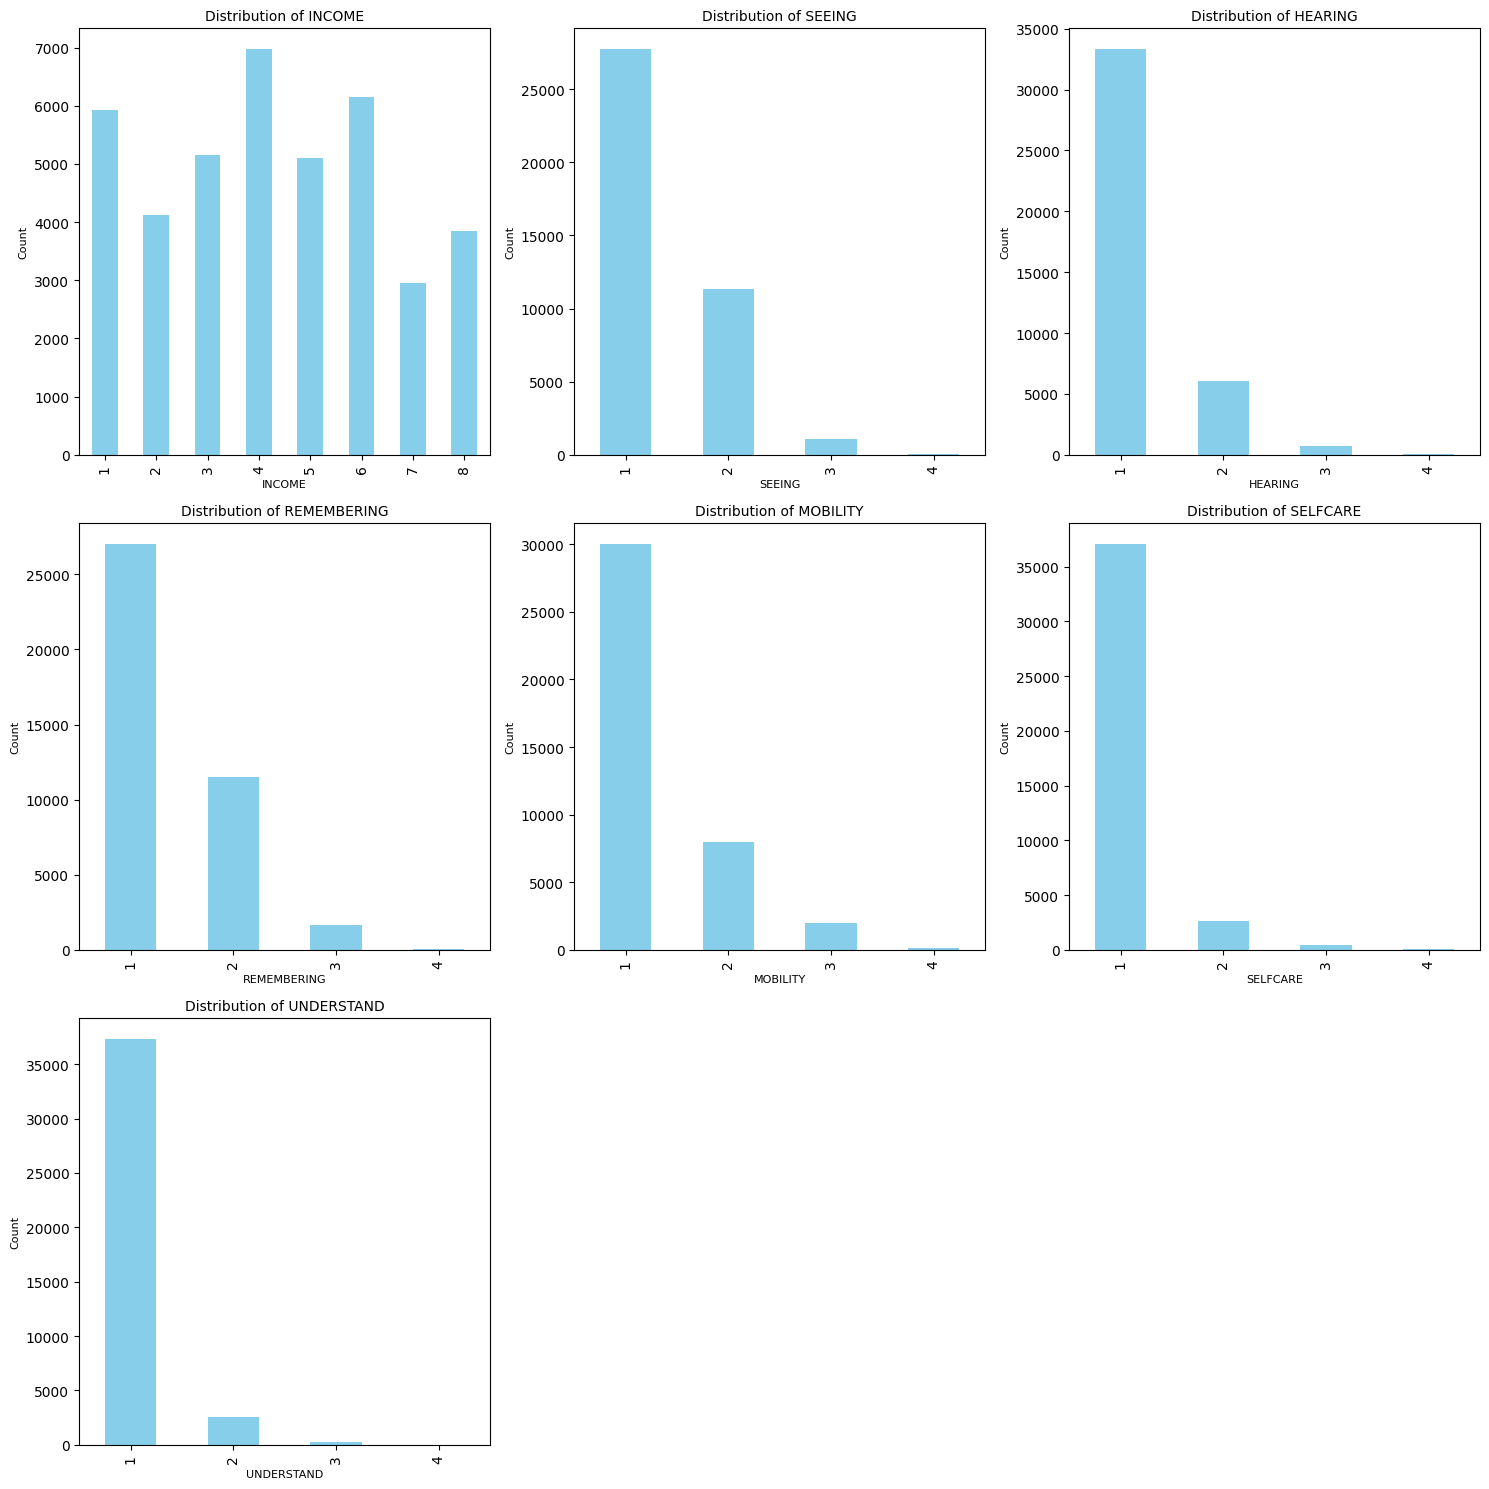

In [29]:
### 1. Bar Plots Grid ###
fig, axes = plt.subplots(3, 3, figsize=(15, 15))  # Create a 3x3 grid for bar plots
axes = axes.flatten()  # Flatten for easy indexing

for i, col in enumerate(categorical_columns):
    if i < len(axes):  # Ensure we don't exceed the grid size
        filtered_data[col].value_counts().sort_index().plot(kind='bar', ax=axes[i], color='skyblue')
        axes[i].set_title(f'Distribution of {col}', fontsize=10)
        axes[i].set_xlabel(col, fontsize=8)
        axes[i].set_ylabel('Count', fontsize=8)

# Hide unused subplots
for j in range(len(categorical_columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

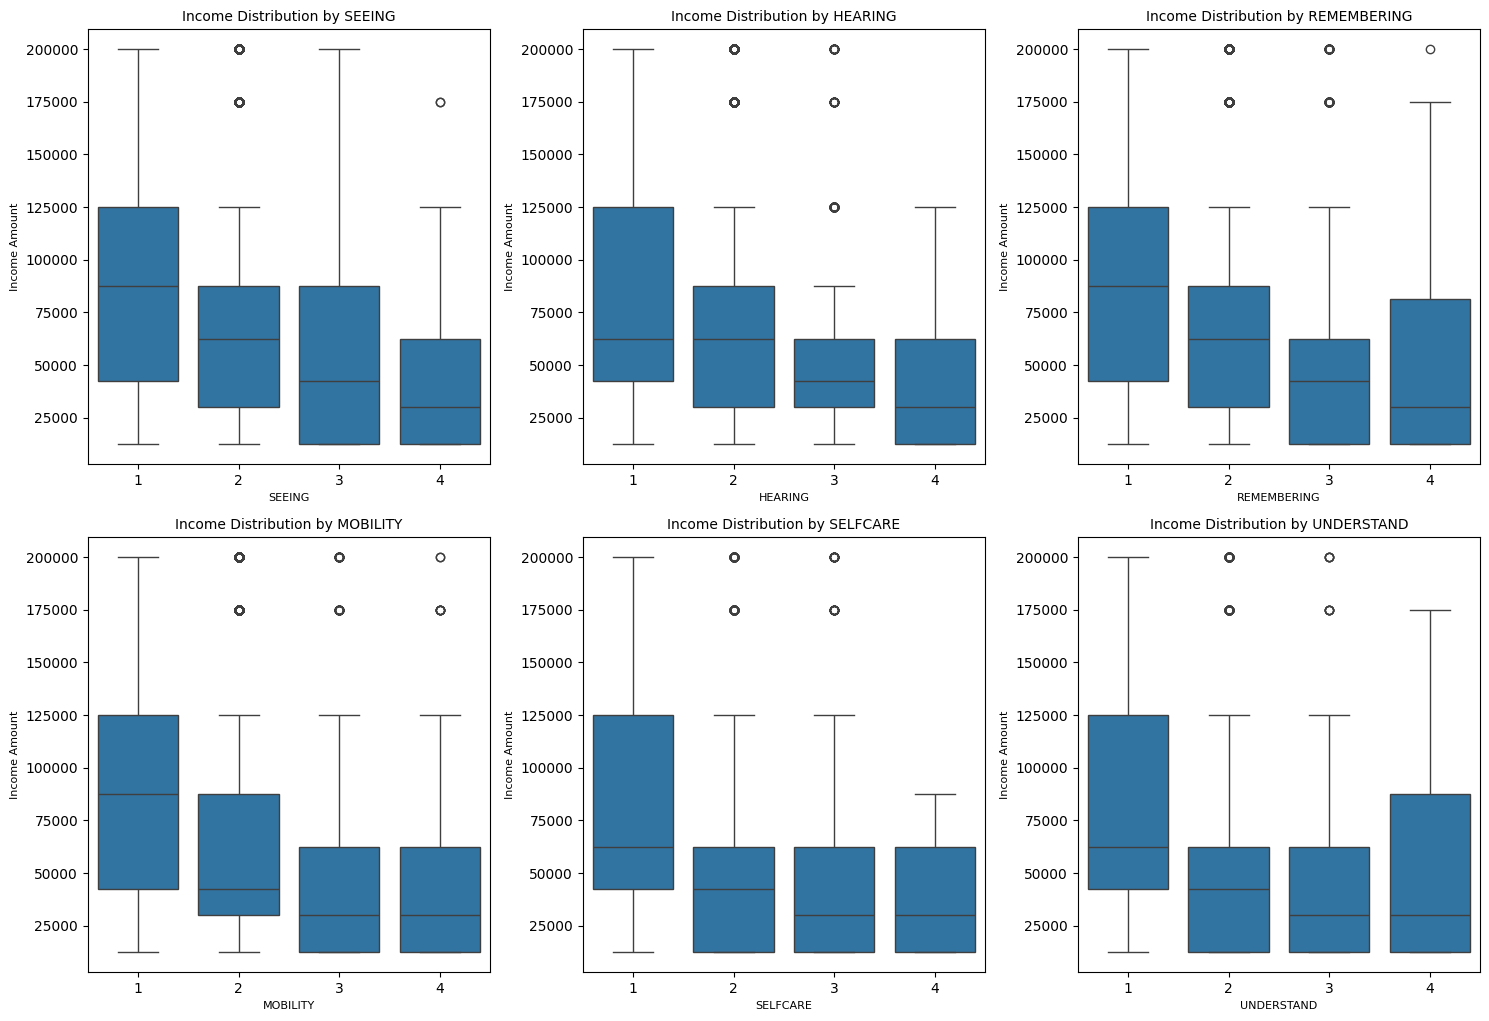

In [30]:
### 2. Box Plots Grid ###
fig, axes = plt.subplots(3, 3, figsize=(15, 15))  # Create a 3x3 grid for box plots
axes = axes.flatten()

for i, col in enumerate(categorical_columns[1:]):  # Skip 'INCOME' for box plots
    if i < len(axes):  # Ensure we don't exceed the grid size
        sns.boxplot(x=col, y='INCOME_AMOUNT', data=filtered_data, ax=axes[i])
        axes[i].set_title(f'Income Distribution by {col}', fontsize=10)
        axes[i].set_xlabel(col, fontsize=8)
        axes[i].set_ylabel('Income Amount', fontsize=8)

# Hide unused subplots
for j in range(len(categorical_columns[1:]), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

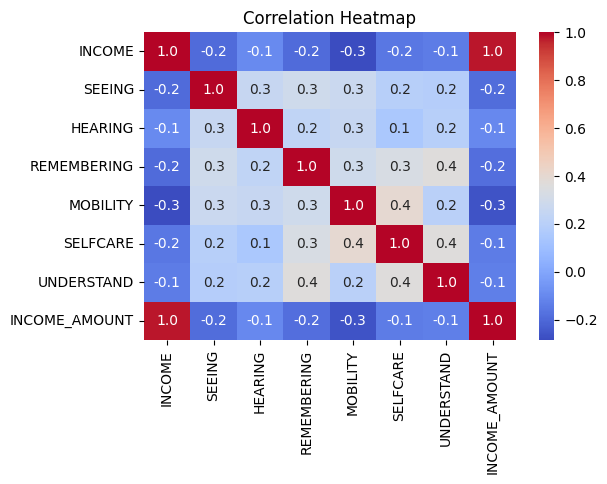

In [34]:
### 3. Correlation Heatmap ###
correlation_matrix_filtered = filtered_data.corr()
plt.figure(figsize=(6, 4))  # Standalone plot for the heatmap
sns.heatmap(correlation_matrix_filtered, annot=True, fmt='.1f', cmap='coolwarm')
plt.title('Correlation Heatmap', fontsize=12)
plt.show()

In [37]:
from scipy.stats import norm
import numpy as np

# Define the disability features
disability_features = ['SEEING', 'HEARING', 'REMEMBERING', 'MOBILITY', 'SELFCARE', 'UNDERSTAND']

# Initialize a dictionary to store results
hypothesis_results = {}

# Perform hypothesis testing for each disability feature
for feature in disability_features:
    # Group data
    no_disability = filtered_data[filtered_data[feature] == 1]['INCOME_AMOUNT']
    disability = filtered_data[filtered_data[feature].isin([2, 3, 4])]['INCOME_AMOUNT']

    # Calculate means and standard errors
    mean_no_disability = no_disability.mean()
    mean_disability = disability.mean()
    std_no_disability = no_disability.std()
    std_disability = disability.std()
    n_no_disability = len(no_disability)
    n_disability = len(disability)

    # Pooled standard error
    pooled_se = np.sqrt((std_no_disability**2 / n_no_disability) + (std_disability**2 / n_disability))

    # Test statistic (Z-score)
    z_score = (mean_no_disability - mean_disability) / pooled_se

    # P-value (two-tailed test)
    p_value = 2 * (1 - norm.cdf(abs(z_score)))

    # Store results
    hypothesis_results[feature] = {
        'mean_no_disability': mean_no_disability,
        'mean_disability': mean_disability,
        'z_score': z_score,
        'p_value': p_value
    }

# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame(hypothesis_results).T
results_df.index.name = 'Feature'

results_df

,mean_no_disability,mean_disability,z_score,p_value
Feature,,,,
SEEING,90895.840835,66445.475731,41.165374,0.0
HEARING,85834.257705,71148.658501,20.397740,0.0
REMEMBERING,90739.128023,68118.546918,38.224892,0.0
MOBILITY,92367.129260,56617.892977,60.786607,0.0
SELFCARE,85898.422755,52833.706786,36.316512,0.0
UNDERSTAND,85551.353450,54369.109948,33.926885,0.0


In [38]:
import numpy as np
from scipy.stats import norm

# Initialize a dictionary to store results for the categorical INCOME column
hypothesis_results_categorical = {}

# Perform hypothesis testing for each disability feature
for feature in disability_features:
    # Group data
    no_disability = filtered_data[filtered_data[feature] == 1]['INCOME']
    disability = filtered_data[filtered_data[feature].isin([2, 3, 4])]['INCOME']

    # Calculate means and standard errors for categorical income levels
    mean_no_disability = no_disability.mean()
    mean_disability = disability.mean()
    std_no_disability = no_disability.std()
    std_disability = disability.std()
    n_no_disability = len(no_disability)
    n_disability = len(disability)

    # Pooled standard error
    pooled_se = np.sqrt((std_no_disability**2 / n_no_disability) + (std_disability**2 / n_disability))

    # Test statistic (Z-score)
    z_score = (mean_no_disability - mean_disability) / pooled_se

    # P-value (two-tailed test)
    p_value = 2 * (1 - norm.cdf(abs(z_score)))

    # Store results
    hypothesis_results_categorical[feature] = {
        'mean_no_disability': mean_no_disability,
        'mean_disability': mean_disability,
        'z_score': z_score,
        'p_value': p_value
    }

# Convert results to a DataFrame for better visualization
results_categorical_df = pd.DataFrame(hypothesis_results_categorical).T
results_categorical_df.index.name = 'Feature'

results_categorical_df


,mean_no_disability,mean_disability,z_score,p_value
Feature,,,,
SEEING,4.545445,3.619335,41.037284,0.0
HEARING,4.347554,3.827501,18.993904,0.0
REMEMBERING,4.537830,3.686152,38.102354,0.0
MOBILITY,4.614783,3.206866,61.036461,0.0
SELFCARE,4.363818,3.012804,36.364359,0.0
UNDERSTAND,4.346729,3.113438,32.609472,0.0


/var/folders/dl/pvnxq0z5655698znkg19dljr0000gn/T/ipykernel_94973/596649315.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
/var/folders/dl/pvnxq0z5655698znkg19dljr0000gn/T/ipykernel_94973/596649315.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
/var/folders/dl/pvnxq0z5655698znkg19dljr0000gn/T/ipykernel_94973/596649315.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
/var/folders/dl/pvnxq0z5655698znkg19dljr0000gn/T/ipykernel_94973/596649315.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated 

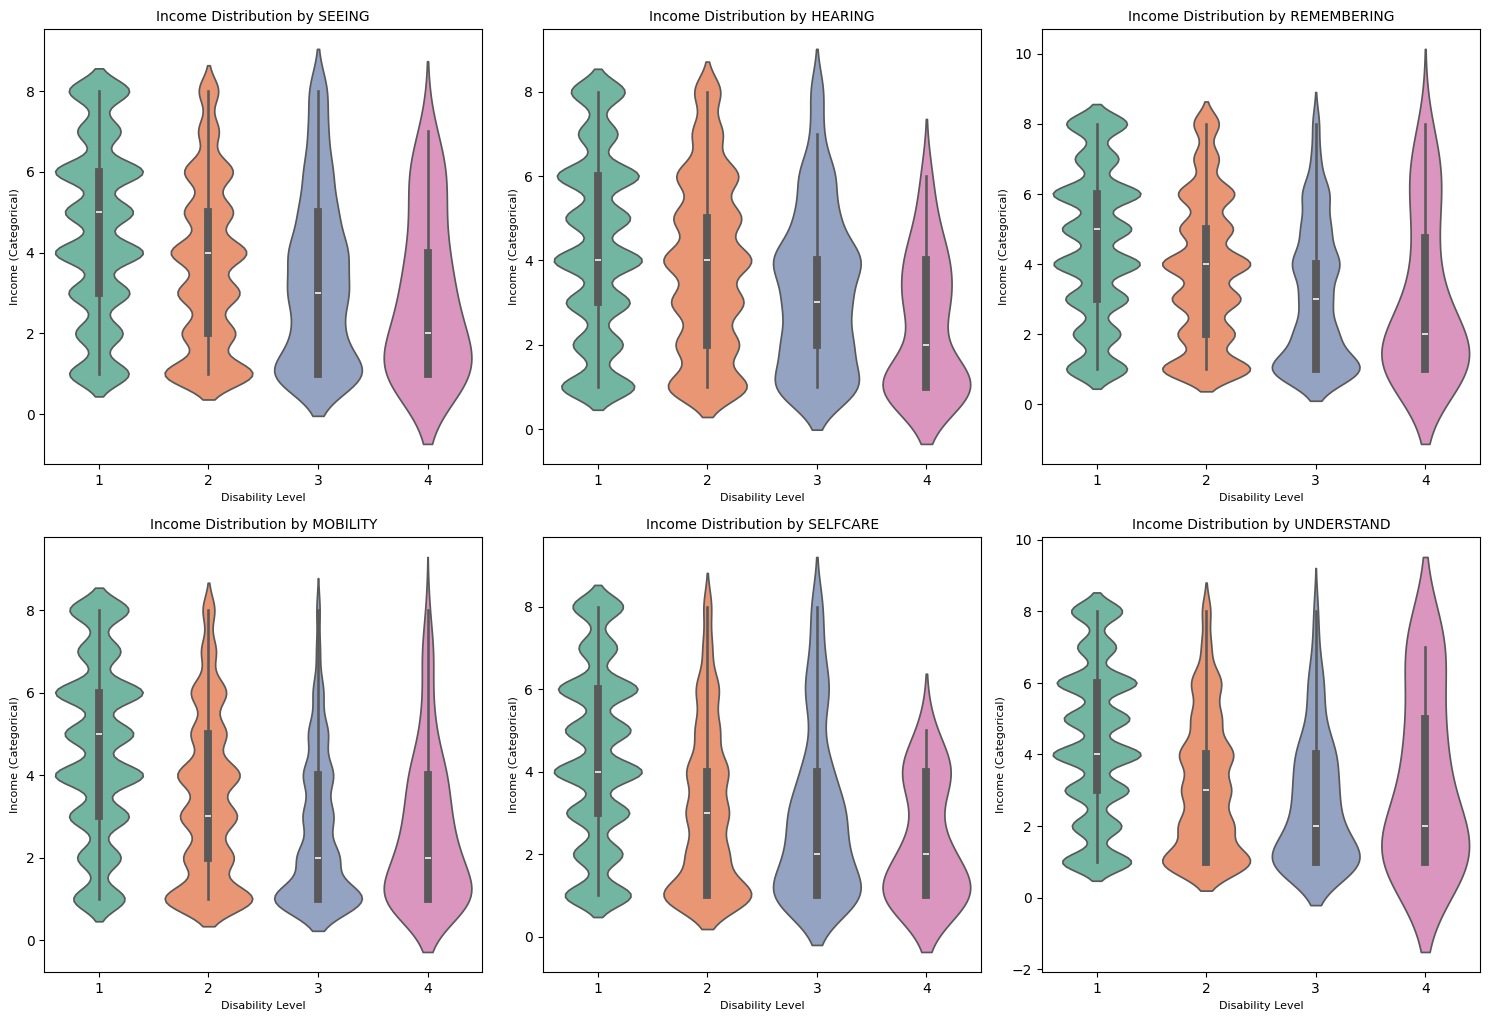

In [40]:
# Create a 3x3 grid for the violin plots
fig, axes = plt.subplots(3, 3, figsize=(15, 15))  # Adjust figure size
axes = axes.flatten()  # Flatten for easy indexing

# Plot violin plots for each disability feature
for i, feature in enumerate(disability_features):
    if i < len(axes):  # Ensure we don't exceed the grid size
        sns.violinplot(
            x=feature, y='INCOME', data=filtered_data, palette='Set2', ax=axes[i]
        )
        axes[i].set_title(f'Income Distribution by {feature}', fontsize=10)
        axes[i].set_xlabel('Disability Level', fontsize=8)
        axes[i].set_ylabel('Income (Categorical)', fontsize=8)

# Hide unused subplots if any
for j in range(len(disability_features), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

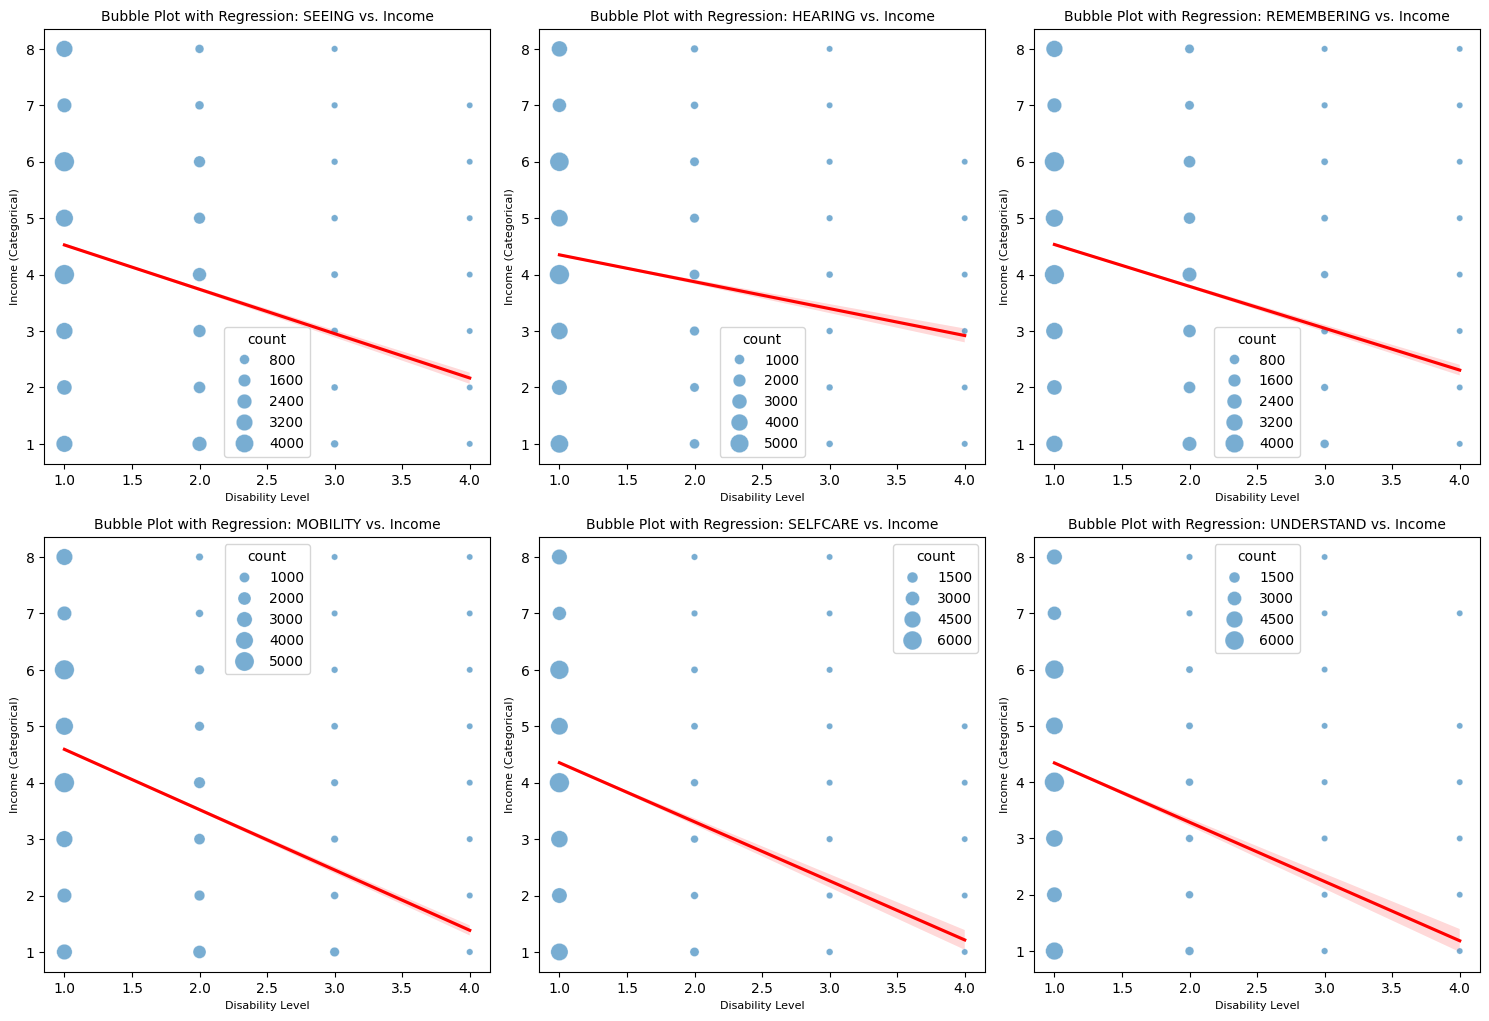

In [42]:
# Create a 3x3 grid for bubble plots with regression lines
fig, axes = plt.subplots(3, 3, figsize=(15, 15))  # Adjust figure size
axes = axes.flatten()  # Flatten for easy indexing

# Plot bubble plots with regression lines for each disability feature
for i, feature in enumerate(disability_features):
    if i < len(axes):  # Ensure we don't exceed the grid size
        # Group data to calculate sizes
        grouped = filtered_data.groupby([feature, 'INCOME']).size().reset_index(name='count')

        # Plot regression line
        sns.regplot(
            data=filtered_data, x=feature, y='INCOME',
            scatter=False, line_kws={'color': 'red'}, ax=axes[i]
        )

        # Plot bubble scatter
        sns.scatterplot(
            data=grouped, x=feature, y='INCOME', size='count', sizes=(20, 200),
            alpha=0.6, ax=axes[i]
        )

        axes[i].set_title(f'Bubble Plot with Regression: {feature} vs. Income', fontsize=10)
        axes[i].set_xlabel('Disability Level', fontsize=8)
        axes[i].set_ylabel('Income (Categorical)', fontsize=8)

# Hide unused subplots
for j in range(len(disability_features), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()